# Prevendo o preço do aluguel em São Paulo
- A empresa HashMoveis contratou você para ajudar a decidir em quais imóveis investir
    - Para isso, precisamos **prever qual seria o aluguel desse imóvel pelo airbnb** e investir nos imóveis que vão **trazer um retorno mais rápido do investimento**

As principais etapas de um projeto de Ciência de Dados são:
1. [Definição do problema](#definicao)
2. [Entendimento e tratamento dos dados](#dados)
3. [Análise Exploratória](#eda)
4. [Tratamento dos Dados](#tratamento)
5. [Definição do modelo](#modelo)
6. [Modelo em produção](#producao)

<a id='definicao'></a>
## Definição do problema

- Para entender o problema, algumas perguntas são fundamentais:
    - De forma direta: **"Qual problema eu quero resolver?"**
    - Quais são minha métricas de sucesso?
    - Qual o prazo desejado para esse projeto?
    - Quem são os interessados nesse resultado?
    - Quais são os **dados** disponíveis

<a id='dados'></a>
## Entendimento e tratamento dos dados
- Vamos utilizar o **pandas** para nos ajudar em todas essa etapa de entendimento dos dados
    - https://pandas.pydata.org/
    - Sugestão de conteúdo: https://www.youtube.com/watch?v=ngTMLkXWMIc&t=75s
- Precisamos entender os dados disponíveis!

In [2]:
# Importando a base
import pandas as pd

In [3]:
# Importando uma base de dados utilizando o pandas
base = pd.read_csv('quinto_andar_transformed_data.csv')

In [4]:
# Visualizando as primeiras linhas da base
base.head(3)
# Tipo: dataframe
# type(base)

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0


**<font color='yellow'>Uma coisa muito importante ao importar uma base é verificar suas informações ( `.info()` )</font>**

In [5]:
# Verificando as informações dessa base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


**Existem valores nulos na base?**

In [6]:
# Verificando valores nulos
# True = está vazio (1) / False = não está vazio (0)
base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         7
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [7]:
# Filtrando esses valores
base[base.bairro == "Liberdade"]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
21,https://www.quintoandar.com.br/imovel/89336421...,Liberdade,600.0,334.0,0.0,8.0,12.0,954.0,60.0,1.0,1.0,0.0,10.0,1.0,0.0,1.0
43,https://www.quintoandar.com.br/imovel/89336704...,Liberdade,1200.0,356.0,60.0,16.0,24.0,1656.0,50.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0
65,https://www.quintoandar.com.br/imovel/89299049...,Liberdade,600.0,378.0,24.0,8.0,12.0,1022.0,33.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,https://www.quintoandar.com.br/imovel/89325487...,Liberdade,1080.0,180.0,21.0,14.0,21.0,1316.0,25.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2716,https://www.quintoandar.com.br/imovel/89292341...,Liberdade,1200.0,310.0,0.0,16.0,24.0,1550.0,40.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2745,https://www.quintoandar.com.br/imovel/89333914...,Liberdade,2500.0,335.0,167.0,32.0,50.0,3084.0,90.0,3.0,3.0,0.0,7.0,1.0,0.0,0.0
2756,https://www.quintoandar.com.br/imovel/89337772...,Liberdade,911.0,376.0,51.0,12.0,18.0,1368.0,40.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0


In [8]:
# Podemos, por exemplo, acessar esses anúncios
base.url[987]

'https://www.quintoandar.com.br/imovel/892886896?house_tags=rentPriceDecreased&search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A1691%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

**Nesse caso, entendemos que valores como condomínio nulo são registros de casas que realmente não possuem condomínio**
- Podemos então substituir esses valores por 0

In [9]:
# Filtrando esses registros
base[base.condominio.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
987,https://www.quintoandar.com.br/imovel/89288689...,Bela Vista,2960.0,NaN,125.0,49.0,59.0,3193.0,100.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
1391,https://www.quintoandar.com.br/imovel/89310205...,Perdizes,5200.0,NaN,1030.0,86.0,104.0,6420.0,220.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0
1527,https://www.quintoandar.com.br/imovel/89310896...,Aclimação,3000.0,NaN,158.0,50.0,60.0,3268.0,90.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0
1801,https://www.quintoandar.com.br/imovel/89284189...,Ipiranga,2600.0,NaN,100.0,43.0,52.0,2795.0,100.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
2287,https://www.quintoandar.com.br/imovel/89288795...,Ipiranga,1000.0,NaN,80.0,17.0,20.0,1117.0,25.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0
2387,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2751,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# Selecionando apenas essa coluna
base.loc[base.condominio.isnull(), 'condominio']

987    NaN
1391   NaN
1527   NaN
1801   NaN
2287   NaN
2387   NaN
2751   NaN
Name: condominio, dtype: float64

In [11]:
# E agora substituindo esses valores por 0
base.loc[base.condominio.isnull(), 'condominio'] = 0

In [12]:
# Verificando novamente valores nulos
base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         0
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [13]:
# Repetindo o mesmo processo
base[base.iptu.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
321,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
580,https://www.quintoandar.com.br/imovel/89276781...,Aclimação,1500.0,477.0,NaN,20.0,30.0,2027.0,67.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0
732,https://www.quintoandar.com.br/imovel/89277791...,Vila Olímpia,3700.0,0.0,NaN,47.0,74.0,3821.0,60.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0
1348,https://www.quintoandar.com.br/imovel/89277231...,Consolação,2696.0,1033.0,NaN,35.0,53.0,3882.0,88.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
1486,https://www.quintoandar.com.br/imovel/89279154...,Jardim Paulista,6750.0,1400.0,NaN,86.0,135.0,8371.0,90.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0
1709,https://www.quintoandar.com.br/imovel/89281155...,Aclimação,3000.0,1100.0,NaN,39.0,60.0,4199.0,100.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
2209,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
2659,https://www.quintoandar.com.br/imovel/89279454...,Bela Vista,906.0,267.0,NaN,12.0,18.0,1203.0,27.0,1.0,1.0,0.0,14.0,0.0,0.0,1.0


In [14]:
# Acessando o anúncio
base.url[732]

'https://www.quintoandar.com.br/imovel/892777910?house_tags=newAd&search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A1370%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

In [15]:
# Verificando quantas linhas temos na base
base[base.iptu.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
321,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
580,https://www.quintoandar.com.br/imovel/89276781...,Aclimação,1500.0,477.0,NaN,20.0,30.0,2027.0,67.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0
732,https://www.quintoandar.com.br/imovel/89277791...,Vila Olímpia,3700.0,0.0,NaN,47.0,74.0,3821.0,60.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0
1348,https://www.quintoandar.com.br/imovel/89277231...,Consolação,2696.0,1033.0,NaN,35.0,53.0,3882.0,88.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
1486,https://www.quintoandar.com.br/imovel/89279154...,Jardim Paulista,6750.0,1400.0,NaN,86.0,135.0,8371.0,90.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0
1709,https://www.quintoandar.com.br/imovel/89281155...,Aclimação,3000.0,1100.0,NaN,39.0,60.0,4199.0,100.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
2209,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
2659,https://www.quintoandar.com.br/imovel/89279454...,Bela Vista,906.0,267.0,NaN,12.0,18.0,1203.0,27.0,1.0,1.0,0.0,14.0,0.0,0.0,1.0


In [16]:
# Podemos excluir essas linhas que estão sem valor de iptu
# axis = 0 => linha / axis = 1 => coluna
base = base.dropna(axis=0)

In [17]:
# Verificando com quantas linhas ficamos agora na base
# base.info()
base.shape
# Linhas / Colunas

(2767, 16)

In [18]:
# Para finalizar, podemos apenas garantir que não temos valores nulos
base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         0
iptu               0
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

**O que é essa primeira coluna?**

In [19]:
# Selecionando uma coluna específica dessa base
base.url

0       https://www.quintoandar.com.br/imovel/89332996...
1       https://www.quintoandar.com.br/imovel/89334069...
2       https://www.quintoandar.com.br/imovel/89333859...
3       https://www.quintoandar.com.br/imovel/89337065...
4       https://www.quintoandar.com.br/imovel/89337700...
                              ...                        
2770    https://www.quintoandar.com.br/imovel/89282425...
2771    https://www.quintoandar.com.br/imovel/89336040...
2772    https://www.quintoandar.com.br/imovel/89292613...
2773    https://www.quintoandar.com.br/imovel/89336592...
2774    https://www.quintoandar.com.br/imovel/89294786...
Name: url, Length: 2767, dtype: object

**Para o nosso modelo, essa coluna não vai ser importante. Então podemos eliminar toda a coluna**

In [20]:
# Eliminando coluna url
base = base.drop('url', axis=1)


In [21]:
# Não tem mais a coluna url
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2767 entries, 0 to 2774
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bairro           2767 non-null   object 
 1   aluguel          2767 non-null   float64
 2   condominio       2767 non-null   float64
 3   iptu             2767 non-null   float64
 4   seguro_incendio  2767 non-null   float64
 5   taxa_serviço     2767 non-null   float64
 6   total            2767 non-null   float64
 7   metragem         2767 non-null   float64
 8   quarto           2767 non-null   float64
 9   banheiro         2767 non-null   float64
 10  vaga_carro       2767 non-null   float64
 11  andar            2767 non-null   float64
 12  aceita_pet       2767 non-null   float64
 13  mobilia          2767 non-null   float64
 14  metro_prox       2767 non-null   float64
dtypes: float64(14), object(1)
memory usage: 345.9+ KB


<a id='eda'></a>
## Análise Exploratória de Dados
- Nessa etapa, nós vamos explorar a nossa base
- Vamos continuar usando o **pandas**
- Sugestão de conteúdo: https://www.youtube.com/watch?v=CLmJZicoXYA&t=1s

In [22]:
# Relembrando a visualização da base
base.head(3)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0


**<font color='yellow'>Outra informação extremamente importante é o resumo estatístico da base ( `.describe()` )</font>**

In [23]:
# Entendendo o resumo estatístico
base.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
mean,2276.430430,596.070473,283.561980,29.923021,45.325985,3232.463679,63.759668,1.593784,1.398265,0.627033,5.924828,0.775208,0.202024,0.733647
std,1327.758115,430.433379,9424.657082,17.660109,26.584522,9600.842536,38.680371,0.748924,0.686907,0.674153,5.000881,0.417521,0.401582,0.442131
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,330.000000,0.000000,18.000000,28.000000,1876.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,1950.000000,520.000000,55.000000,26.000000,39.000000,2615.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,2735.000000,800.000000,140.000000,36.000000,54.000000,3751.000000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000
max,11250.000000,3300.000000,495800.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,43.000000,1.000000,1.000000,1.000000


**<font color='red'>O que significa dizer que o aluguel tem média de 2.276, desvio padrão de 1.327, mínimo de 500 e máximo de 11.250 reais?</font>**

In [24]:
# Somando todos os valores de aluguel
totalAluguel = base.aluguel.sum()

In [25]:
# Contando a quantidade de valores
quantAluguel = base.aluguel.count()

In [26]:
# Dividindo um pelo outro (soma / contagem)
mediaAluguel = totalAluguel/quantAluguel
print(mediaAluguel)

2276.4304300686663


In [27]:
# Calculando média (mean), desvio padrão (std), mínimo (min) e máximo (max)
base.aluguel.mean()

2276.4304300686663

In [28]:
base.aluguel.std()

1327.7581152326218

In [29]:
base.aluguel.min()

500.0

In [30]:
base.aluguel.max()

11250.0

In [31]:
# O que significa esses 50%? (A mediana da nossa base)
base.aluguel.median()
# Metade dos valores estão entre 500 e 1950, a outra metade entre 1950 e 11250
# ! Conclusão = Valores baixos aparecem mais vezes 

1950.0

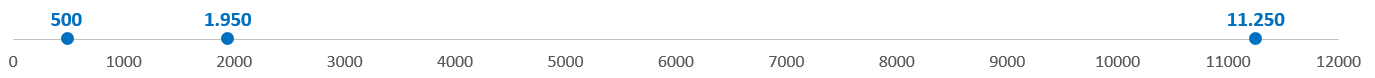

In [32]:
# Contando o número de registros antes e depois de 1950
# Antes = 1387
base[base.aluguel <= 1950]
# Depois = 1380
base[base.aluguel > 1950]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0
12,Barra Funda,2500.0,670.0,130.0,32.0,50.0,3382.0,66.0,2.0,2.0,1.0,9.0,1.0,0.0,1.0
13,Santa Cecília,2600.0,0.0,232.0,43.0,52.0,2927.0,99.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0
15,Jardim Paulista,2300.0,395.0,40.0,30.0,46.0,2811.0,38.0,1.0,1.0,0.0,16.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,Consolação,3490.0,580.0,42.0,45.0,69.0,4226.0,60.0,1.0,2.0,0.0,8.0,1.0,0.0,1.0
2765,Consolação,2400.0,380.0,0.0,31.0,48.0,2859.0,55.0,1.0,1.0,0.0,9.0,1.0,1.0,1.0
2767,Vila Nova Conceição,3090.0,900.0,184.0,40.0,61.0,4275.0,85.0,2.0,2.0,1.0,12.0,1.0,0.0,0.0
2770,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0


In [33]:
# E esses 25% e 75%?
# 25% = 1400
base.aluguel.quantile(0.25)
# 50% = 1950
base.aluguel.quantile(0.50)
# 75% = 2735
base.aluguel.quantile(0.75)

2735.0

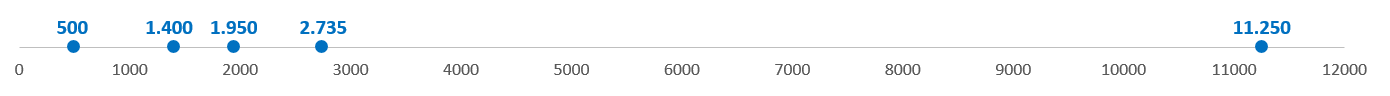

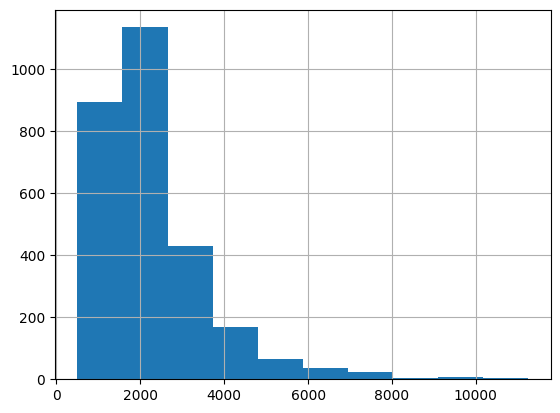

In [34]:
# Plotando um histograma
base.aluguel.hist();

**Como eu poderia melhorar esse plot?**
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html#

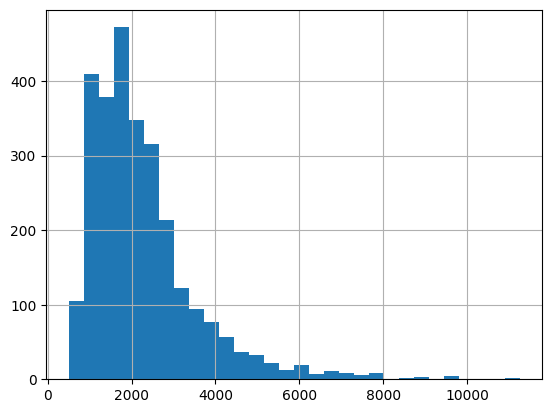

In [35]:
# Melhorando o histograma (diminuindo a largura das colunas)
base.aluguel.hist(bins=30);

**Só para conhecimento, existem outras bibliotecas que podemos melhorar muito o visual, mas não vamos focar nisso agora**
- https://matplotlib.org/stable/plot_types/stats/hist_plot.html#sphx-glr-plot-types-stats-hist-plot-py

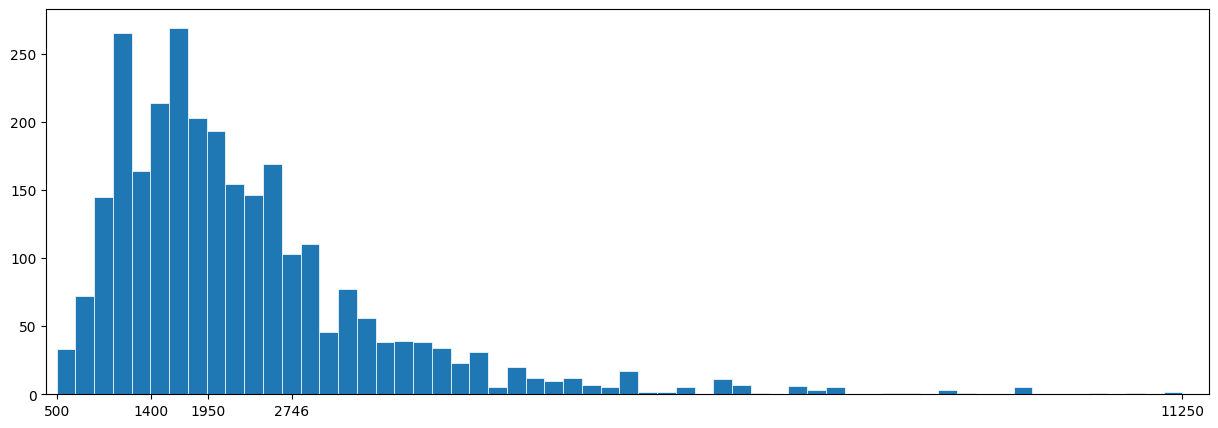

In [36]:
# Melhorando o visual
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(base.aluguel, bins=60, linewidth=0.5, edgecolor="white")

ax.set(xlim=(400, 11500), xticks=[500,1400,1950,2746.5,11250])

plt.show()

In [37]:
# Além disso, também podemos ver quais são os intervalos e o número de valores em cada faixa desse histograma
import numpy as np
np.histogram(base.aluguel,bins=60)

(array([ 33,  72, 145, 265, 164, 214, 269, 203, 193, 154, 146, 169, 103,
        110,  46,  77,  56,  38,  39,  38,  34,  23,  31,   5,  20,  12,
         10,  12,   7,   5,  17,   2,   2,   5,   0,  11,   7,   1,   0,
          6,   3,   5,   0,   0,   1,   1,   0,   3,   1,   0,   0,   5,
          0,   0,   0,   1,   0,   1,   0,   2], dtype=int64),
 array([  500.        ,   679.16666667,   858.33333333,  1037.5       ,
         1216.66666667,  1395.83333333,  1575.        ,  1754.16666667,
         1933.33333333,  2112.5       ,  2291.66666667,  2470.83333333,
         2650.        ,  2829.16666667,  3008.33333333,  3187.5       ,
         3366.66666667,  3545.83333333,  3725.        ,  3904.16666667,
         4083.33333333,  4262.5       ,  4441.66666667,  4620.83333333,
         4800.        ,  4979.16666667,  5158.33333333,  5337.5       ,
         5516.66666667,  5695.83333333,  5875.        ,  6054.16666667,
         6233.33333333,  6412.5       ,  6591.66666667,  6770.8333333

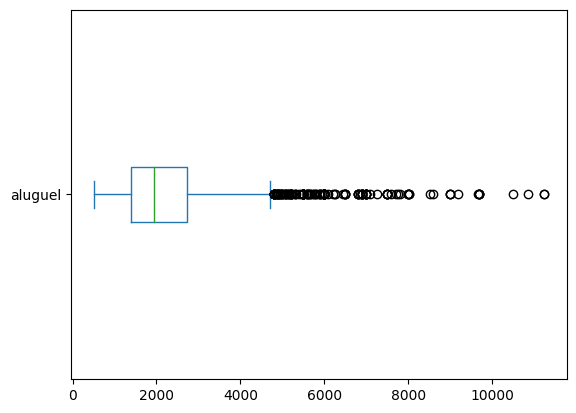

In [38]:
# Uma outra forma de visualizar essa informação é utilizando o boxplot
base.aluguel.plot.box(vert=False);

**O que faz uma propriedade ser mais cara?**

In [39]:
# Verificando as 10 propriedades de maior valor
# Ordem crescente
base.sort_values('aluguel')
# Ordem decrescente
base.sort_values('aluguel', ascending=False)
# Os 10 maiores valores
base.sort_values('aluguel', ascending=False).head(10)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
235,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
1402,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
255,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0


**Podemos perceber que é necessário um novo tratamento na base durante o processo da análise exploratória**

In [40]:
# Eliminando esses valores
base = base.drop_duplicates(keep='last')

In [41]:
# Verificando novamente o top 10 alugueis
base.sort_values('aluguel', ascending=False).head(10)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0
1505,Jardim Paulista,9000.0,2480.0,496.0,115.0,180.0,12270.0,160.0,3.0,4.0,1.0,7.0,1.0,0.0,1.0
2047,Vila Olímpia,8999.0,2300.0,616.0,115.0,179.0,12210.0,128.0,3.0,3.0,2.0,2.0,1.0,0.0,0.0
680,Jardim Paulista,8990.0,1362.0,352.0,114.0,179.0,11000.0,140.0,2.0,3.0,1.0,19.0,1.0,0.0,1.0


<AxesSubplot: xlabel='aluguel', ylabel='metragem'>

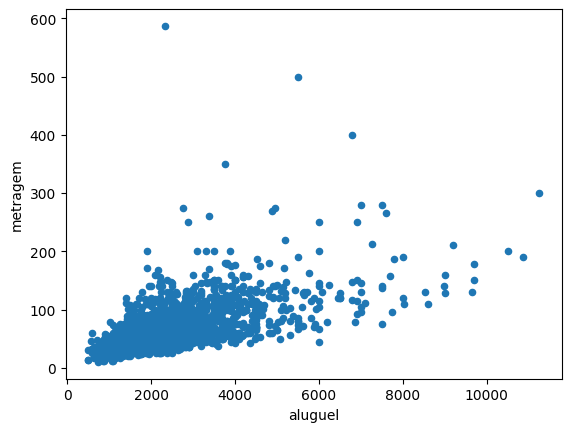

In [42]:
# Será que existe relação entre aluguel e metragem?
base.plot.scatter(x='aluguel', y='metragem')
# Conclusão = Quanto maior a metragem, maior o aluguel

<AxesSubplot: xlabel='quarto', ylabel='aluguel'>

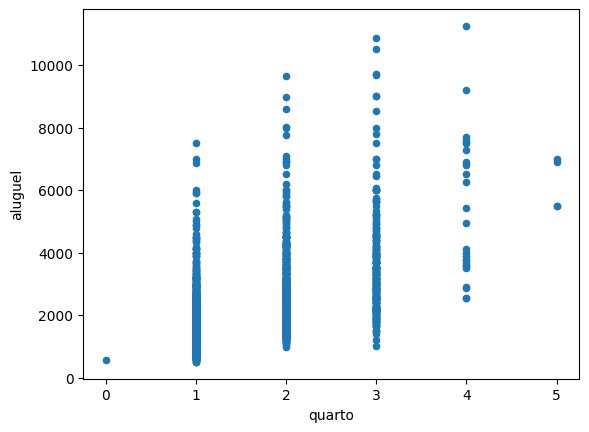

In [43]:
# E entre aluguel e quartos?
base.plot.scatter(x='quarto', y='aluguel')

**Além do próprio pandas e do matplotlib que já mostramos, também podemos usar outras bibliotecas para entender melhor os dados**
- https://seaborn.pydata.org/examples/grouped_boxplot.html

In [44]:
# Importando o seaborn
import seaborn as sns


<AxesSubplot: xlabel='metro_prox', ylabel='aluguel'>

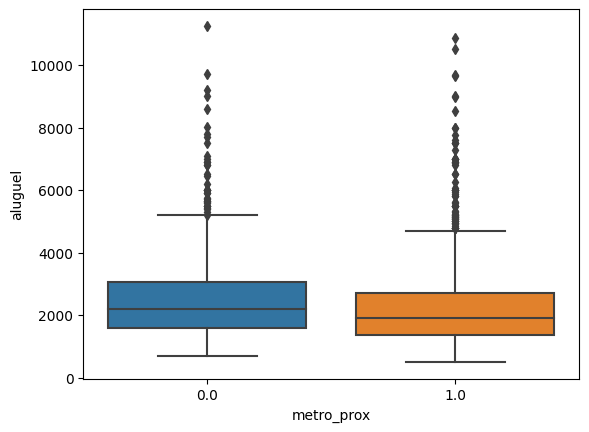

In [45]:
# Qual será a média de aluguel entre propriedades próximas e distantes do metrô?
sns.boxplot(x='metro_prox', y='aluguel', data=base)
# Conclusão = Quando não tem metrô próximo, os alugueis são maiores

<AxesSubplot: xlabel='aluguel', ylabel='bairro'>

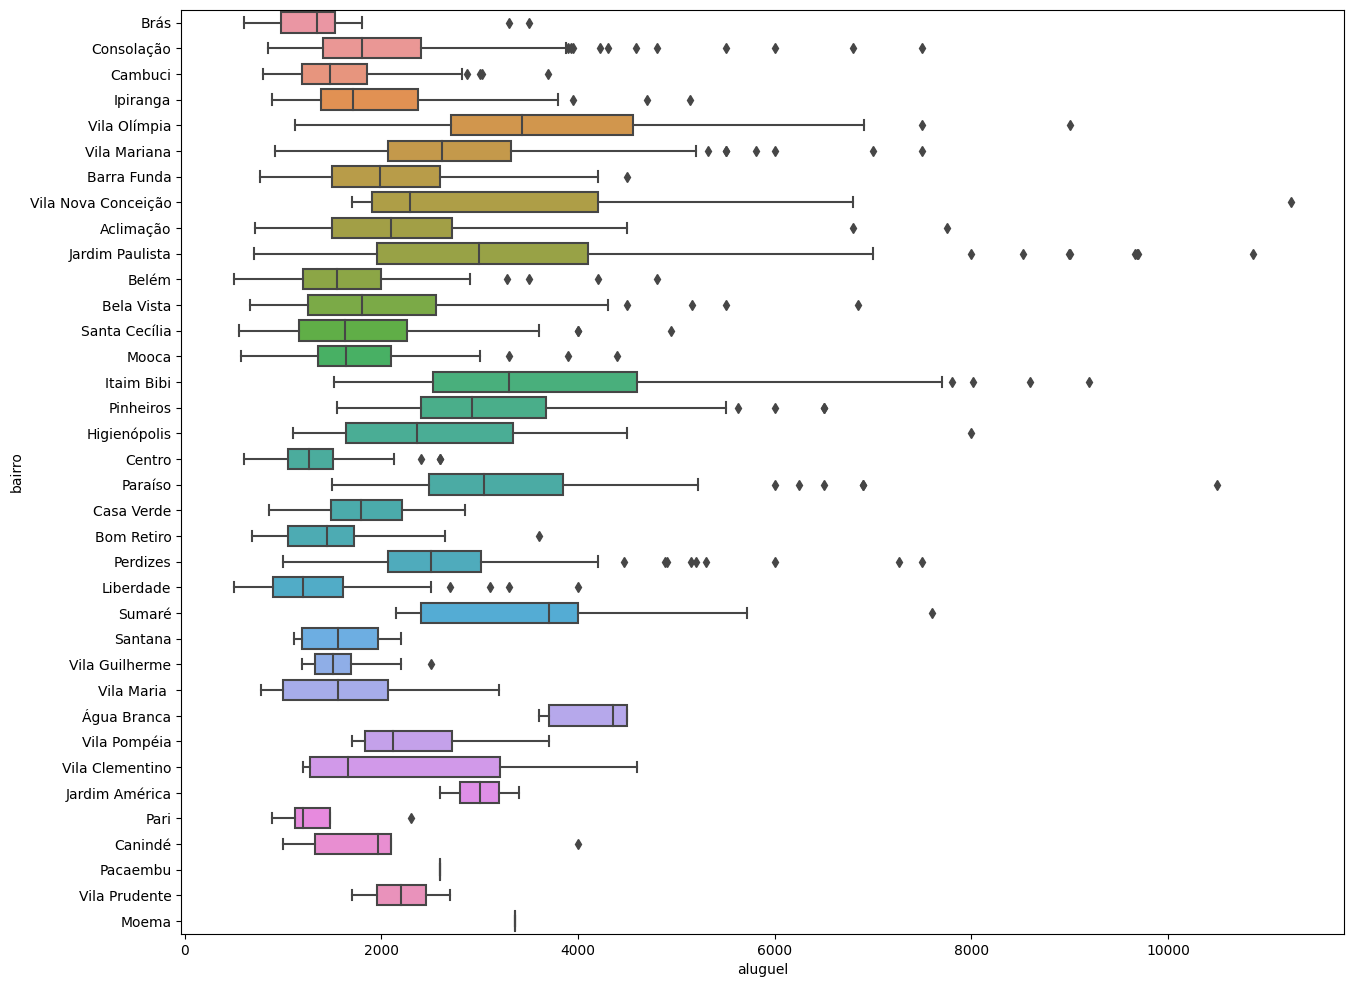

In [46]:
# E se quisermos avaliar o bairro?
# sns.boxplot(x='bairro', y='aluguel', data=base)
# Visualização ruim, mudandos os parâmetros
# Aumentando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(15,12))
# Orientação = horizontal (h)
# Eixo x = Valores numéricos
# Eixo y = Valores discretos
sns.boxplot(x='aluguel', y='bairro', data=base, orient='h')

In [47]:
# Verificando a quantidade de registros em cada bairro
base.bairro.value_counts()

Consolação             271
Jardim Paulista        190
Bela Vista             187
Santa Cecília          178
Pinheiros              117
Vila Mariana           114
Mooca                   99
Itaim Bibi              87
Cambuci                 86
Liberdade               86
Perdizes                84
Centro                  80
Aclimação               75
Paraíso                 59
Ipiranga                55
Barra Funda             53
Bom Retiro              51
Belém                   35
Brás                    29
Vila Olímpia            29
Higienópolis            28
Casa Verde              24
Vila Guilherme          18
Vila Nova Conceição     14
Vila Pompéia            14
Vila Clementino         10
Sumaré                   9
Santana                  8
Canindé                  6
Vila Maria               6
Água Branca              5
Pari                     4
Jardim América           2
Vila Prudente            2
Pacaembu                 1
Moema                    1
Name: bairro, dtype: int64

**Algo que pode ser feito é incluirmos novas informações na base quando acharmos necessário**

In [48]:
# Importando uma base de bairros x regiões
regioes = pd.read_excel('bairros.xlsx')

In [49]:
# Visualizando as três primeiras linhas
regioes.head(3)

,Bairro,Região
0,Sé,Centro
1,Bela Vista,Centro
2,Bom Retiro,Centro


In [50]:
# Visualizando as informações da base de dados
regioes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Bairro  113 non-null    object
 1   Região  113 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [51]:
# Unindo essas duas bases
base2 = pd.merge(
    # Base antiga
    base,
    # Base nova
    regioes,
    # Juntando pela esquerda
    how = 'left',
    # left_on = Começando na coluna esquerda, da base esquerda
    # right_on = Começando na coluna direita, da base direita
    left_on = 'bairro', right_on='Bairro'
)
# ! A partir de agora, a base2 vai ser a base definitiva

In [52]:
# Visualizando novamente a base
base2.head(3)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Brás,600.0,450.0,14.0,8.0,12.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste
1,Consolação,1790.0,598.0,10.0,23.0,35.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro
2,Cambuci,1550.0,1.0,28.0,26.0,31.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro


**Toda vez que eu adiciono novos dados, eu preciso garantir que nada ficou com valor vazio**

In [53]:
# Filtrando os valores onde a Região é nula
base2[base2.Região.isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
234,Vila Maria,3200.0,680.0,68.0,41.0,64.0,4053.0,80.0,2.0,2.0,1.0,7.0,1.0,0.0,0.0,NaN,NaN
820,Vila Maria,850.0,0.0,42.0,15.0,17.0,924.0,40.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
1262,Vila Maria,1460.0,220.0,106.0,19.0,29.0,1834.0,70.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
1684,Vila Maria,2200.0,653.0,172.0,28.0,44.0,3097.0,79.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
1845,Vila Maria,1657.0,1050.0,291.0,21.0,33.0,3052.0,110.0,2.0,3.0,2.0,4.0,1.0,0.0,0.0,NaN,NaN
2227,Vila Maria,772.0,0.0,100.0,13.0,15.0,900.0,45.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN


In [54]:
# Verificando se existe Vila Maria na base que importamos
regioes[regioes.Bairro == 'Vila Maria']

,Bairro,Região
58,Vila Maria,Norte


In [55]:
# Na base, trazendo apenas o nome do bairro
base2.loc[base2.Região.isnull(), 'bairro']
# Conclusão = Há um erro de digitação, tem espaço depois de Maria

234     Vila Maria 
820     Vila Maria 
1262    Vila Maria 
1684    Vila Maria 
1845    Vila Maria 
2227    Vila Maria 
Name: bairro, dtype: object

In [56]:
# Subtituindo a região por norte
base2.loc[base2.Região.isnull(), 'Região'] = 'Norte'

In [57]:
# E corrigindo o nome de Vila Maria
base2.loc[base2.bairro == 'Vila Maria ', 'bairro'] = 'Vila Maria'

In [58]:
# Novamente verificando se ainda existe algum valor nulo
base2[base2.Região.isnull()]
# Conclusão = Não há (problema resolvido)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região


<AxesSubplot: xlabel='aluguel', ylabel='Região'>

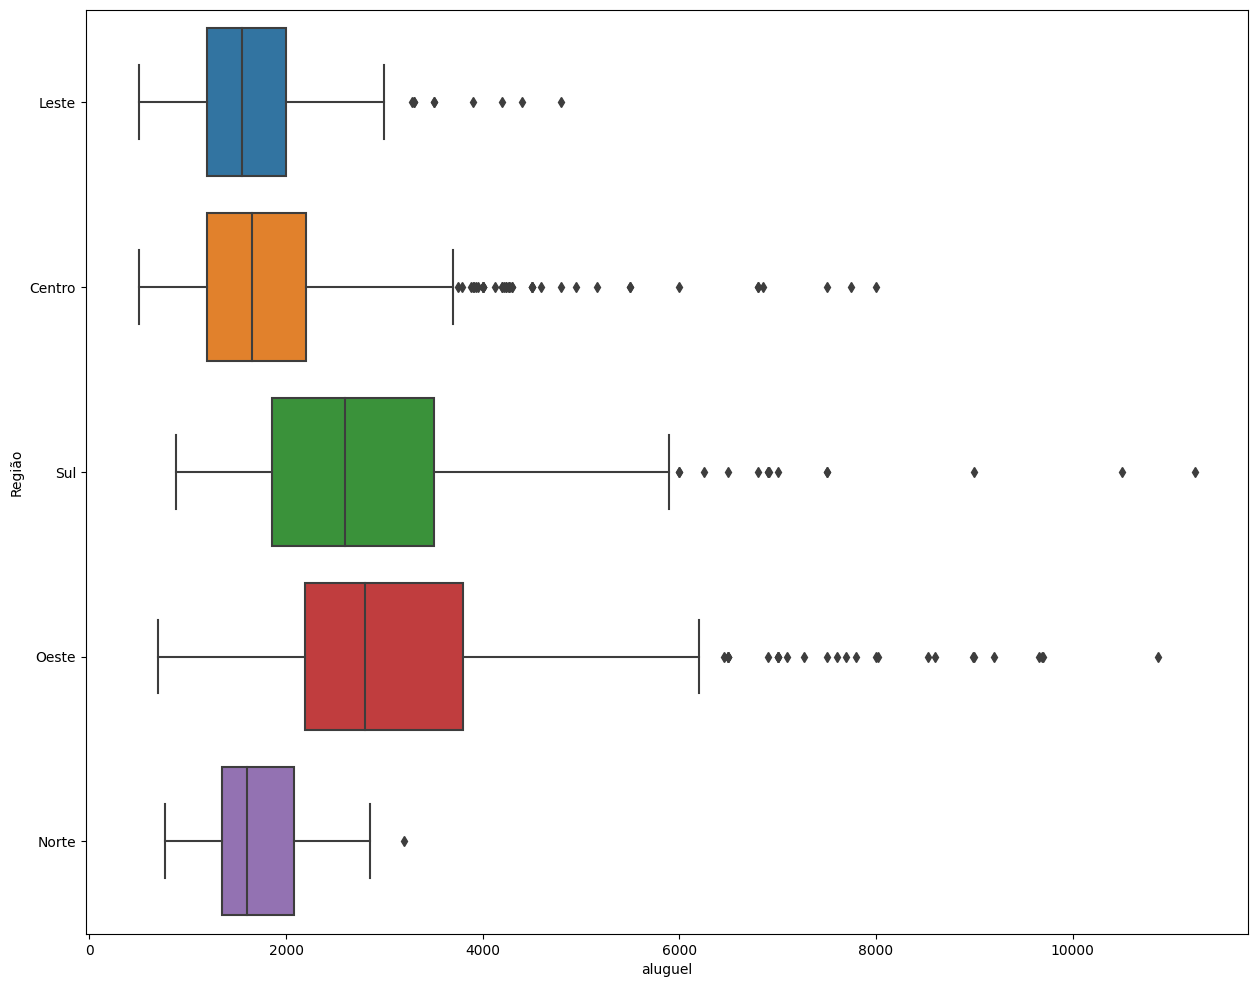

In [59]:
# E agora traçando o gráfico pela região
# Aumentando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(15,12))
# Orientação = horizontal (h)
# Eixo x = Valores numéricos
# Eixo y = Valores discretos
sns.boxplot(x='aluguel', y='Região', data=base2, orient='h')
# Conclusão = A região Oeste tem os alugueis mais caros, a região Norte os mais baratos

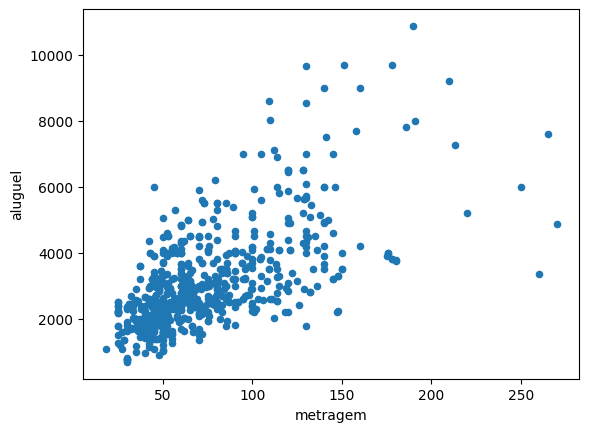

In [60]:
# Será que existe relação entre aluguel e metragem para a REGIÃO OESTE?
base2[base2.Região == 'Oeste'].plot.scatter(x='metragem', y='aluguel');

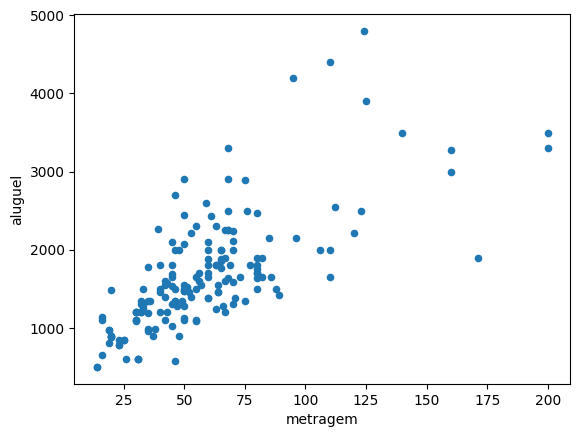

In [61]:
# E para a REGIÃO LESTE?
base2[base2.Região == 'Leste'].plot.scatter(x='metragem', y='aluguel');

In [62]:
# Redefinindo a base antiga como a base nova
base = base2

**Novamente, só para conhecimento, existem outras bibliotecas que podemos melhorar muito o visual, mas não vamos focar nisso agora**
- https://matplotlib.org/stable/plot_types/stats/hist_plot.html#sphx-glr-plot-types-stats-hist-plot-py

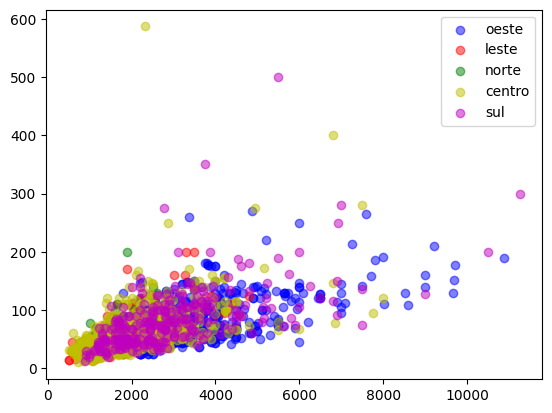

In [63]:
# Plotando todas as figuras em um único gráfico
fig, ax = plt.subplots()

oeste = base[base.Região == 'Oeste']
leste = base[base.Região == 'Leste']
norte = base[base.Região == 'Norte']
centro = base[base.Região == 'Centro']
sul = base[base.Região == 'Sul']

ax.scatter(oeste.aluguel, oeste.metragem, c='b',alpha=0.5,label='oeste')
ax.scatter(leste.aluguel, leste.metragem, c='r',alpha=0.5,label='leste')
ax.scatter(norte.aluguel, norte.metragem, c='g',alpha=0.5,label='norte')
ax.scatter(centro.aluguel, centro.metragem, c='y',alpha=0.5,label='centro')
ax.scatter(sul.aluguel, sul.metragem, c='m',alpha=0.5,label='sul')

ax.legend()

plt.show()

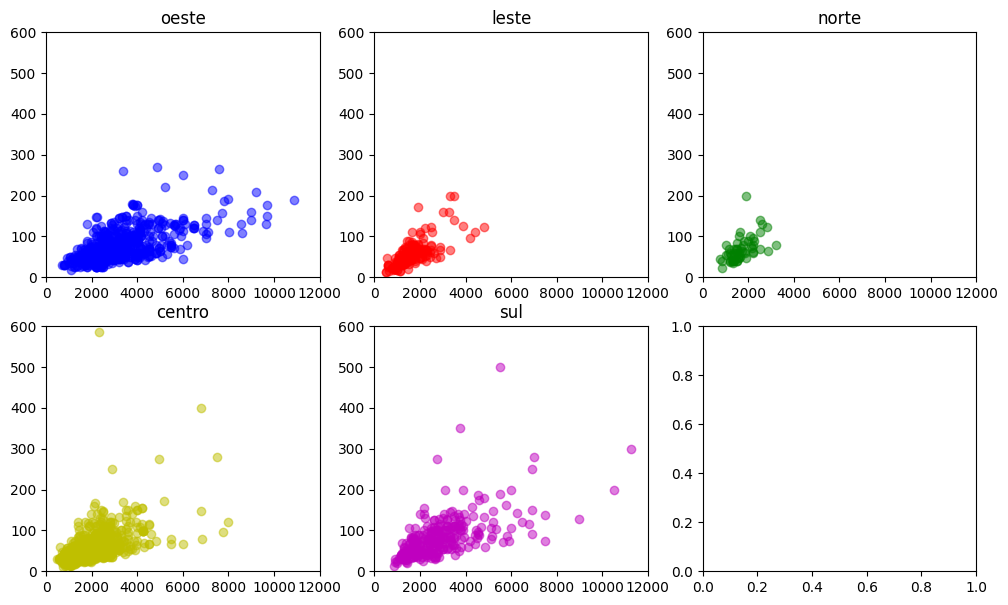

In [64]:
# Criando um gráfico para cada região
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(12,7))

oeste = base[base.Região == 'Oeste']
leste = base[base.Região == 'Leste']
norte = base[base.Região == 'Norte']
centro = base[base.Região == 'Centro']
sul = base[base.Região == 'Sul']

ax[0,0].scatter(oeste.aluguel, oeste.metragem, c='b',alpha=0.5,label='oeste')
ax[0,1].scatter(leste.aluguel, leste.metragem, c='r',alpha=0.5,label='leste')
ax[0,2].scatter(norte.aluguel, norte.metragem, c='g',alpha=0.5,label='norte')
ax[1,0].scatter(centro.aluguel, centro.metragem, c='y',alpha=0.5,label='centro')
ax[1,1].scatter(sul.aluguel, sul.metragem, c='m',alpha=0.5,label='sul')

ax[0,0].set(xlim=(0, 12000),ylim=(0, 600))
ax[0,1].set(xlim=(0, 12000),ylim=(0, 600))
ax[0,2].set(xlim=(0, 12000),ylim=(0, 600))
ax[1,0].set(xlim=(0, 12000),ylim=(0, 600))
ax[1,1].set(xlim=(0, 12000),ylim=(0, 600))

ax[0,0].set_title('oeste')
ax[0,1].set_title('leste')
ax[0,2].set_title('norte')
ax[1,0].set_title('centro')
ax[1,1].set_title('sul')

plt.show()

<a id='correlacoes'></a>
**Existe alguma relação entre essas variáveis?**

In [65]:
# Verificando a correlação dessa base
base.corr()

C:\Users\Renan\AppData\Local\Temp\ipykernel_5372\1200542918.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  base.corr()


,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
aluguel,1.000000,0.547477,0.028619,0.986592,0.999937,0.180066,0.625594,0.536307,0.645005,0.566189,0.117477,0.090506,0.195236,-0.107808
condominio,0.547477,1.000000,-0.022161,0.478443,0.547217,0.089427,0.410019,0.414734,0.523017,0.566976,0.242036,0.064668,0.115346,0.000910
iptu,0.028619,-0.022161,1.000000,0.043838,0.028759,0.987828,0.054086,0.073957,0.056725,-0.011616,-0.025528,0.012266,-0.010007,0.010633
seguro_incendio,0.986592,0.478443,0.043838,1.000000,0.986566,0.190569,0.662295,0.551111,0.642922,0.559802,0.072388,0.092343,0.181506,-0.122333
taxa_serviço,0.999937,0.547217,0.028759,0.986566,1.000000,0.180184,0.625697,0.536624,0.644766,0.566322,0.117122,0.091285,0.194803,-0.108255
total,0.180066,0.089427,0.987828,0.190569,0.180184,1.000000,0.151059,0.159203,0.160734,0.085004,-0.000086,0.026351,0.020175,-0.003480
metragem,0.625594,0.410019,0.054086,0.662295,0.625697,0.151059,1.000000,0.725122,0.665260,0.448426,-0.060388,0.139389,-0.054571,-0.152064
quarto,0.536307,0.414734,0.073957,0.551111,0.536624,0.159203,0.725122,1.000000,0.663906,0.445602,-0.021817,0.119335,-0.100762,-0.200685
banheiro,0.645005,0.523017,0.056725,0.642922,0.644766,0.160734,0.665260,0.663906,1.000000,0.516650,0.044936,0.070850,-0.014080,-0.142516
vaga_carro,0.566189,0.566976,-0.011616,0.559802,0.566322,0.085004,0.448426,0.445602,0.516650,1.000000,0.193923,0.064124,0.111359,-0.144232


C:\Users\Renan\AppData\Local\Temp\ipykernel_5372\4261162872.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base.corr(),annot=True,cmap='RdYlGn')


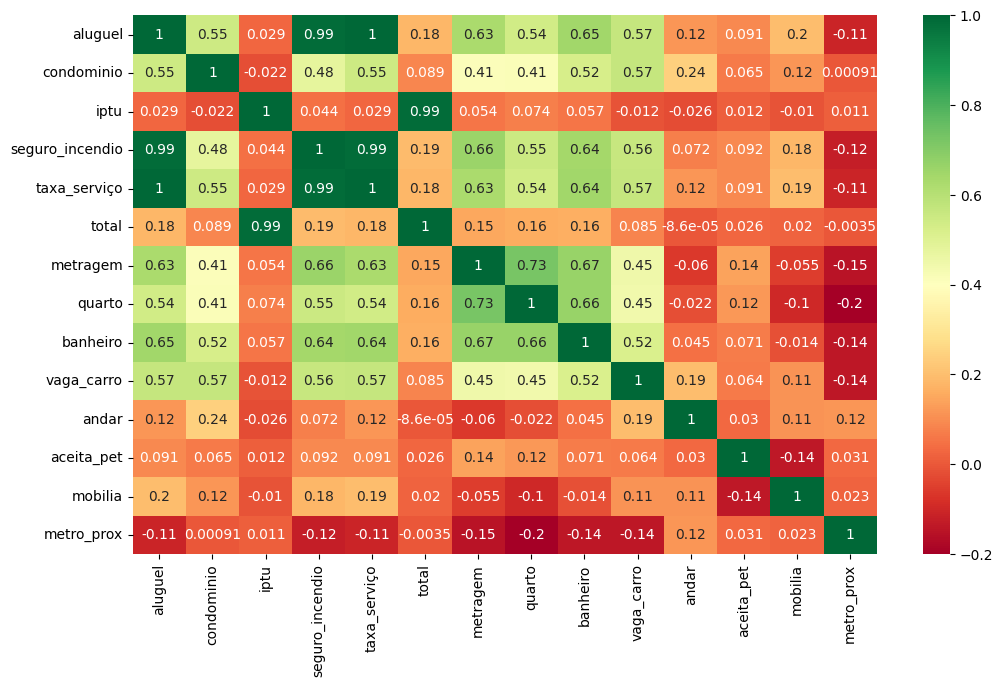

In [66]:
# Podemos tornar essa ifnormação mais visual usando o próprio seaborn
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(base.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [67]:
# Verificando o outlier do total
base.total.max()
# ! Conclusão = Há um aluguel extremamente caro (499600) = Possível erro

499600.0

In [110]:
# Filtrando essa linha
base[base.total == base.total.max()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
1188,Santa Cecília,3600.0,0.0,495800.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,Santa Cecília,Centro


In [111]:
# Importando a base novamente para verificar essa informação
verificar = pd.read_csv('quinto_andar_transformed_data.csv')

In [112]:
# Buscando por esse registro
verificar[verificar.iptu == verificar.iptu.max()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
1707,https://www.quintoandar.com.br/imovel/89337922...,Santa Cecília,3600.0,0.0,495800.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0


In [118]:
# Tratando esse valor
verificar.url[1707]
# Conclusão = O iptu é de 495 reais

'https://www.quintoandar.com.br/imovel/893379229?house_tags=newAd&search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A2561%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

In [119]:
# Corrigindo o erro do iptu
base.loc[base.total == base.total.max(), 'iptu'] = 495.8

In [120]:
# Corrigindo o erro do total
# Aluguel + IPTU + Seguro_Incendio + Taxa_Serviço = Total
# 3600 + 495.8 + 60 + 72 = 4227.8
base.loc[base.total == base.total.max(), 'total'] = 4227.8

C:\Users\Renan\AppData\Local\Temp\ipykernel_5372\2130694025.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base.corr(),annot=True,cmap='RdYlGn')


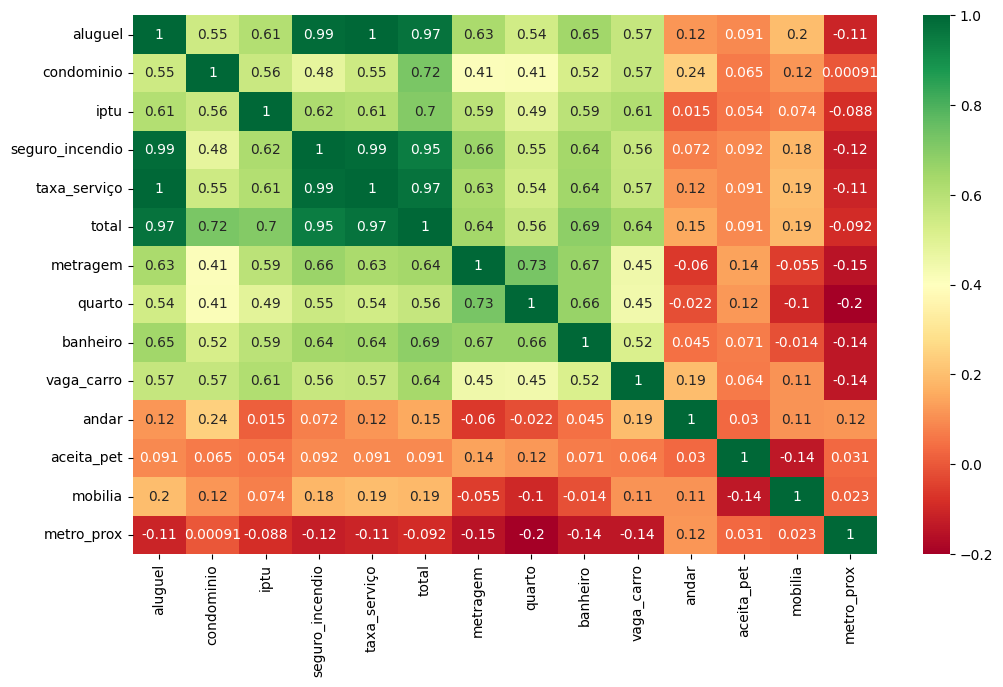

In [121]:
# Agora com os valores corrigidos
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(base.corr(),annot=True,cmap='RdYlGn')
plt.show()
# Conclusão = O aluguel agora está correlacionado com condominio, iptu, taxa_serviço e total

**Agora que fizemos esse tratamento podemos [voltar](#correlacoes) e rever as correlações**

<a id='tratamento'></a>
## Tratamento dos Dados

In [122]:
# Visualizando novamente a nossa base
base.head(3)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Brás,600.0,450.0,14.0,8.0,12.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste
1,Consolação,1790.0,598.0,10.0,23.0,35.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro
2,Cambuci,1550.0,1.0,28.0,26.0,31.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro


In [123]:
# Verificando a taxa de serviço
base.taxa_serviço

0       12.0
1       35.0
2       31.0
3       32.0
4       34.0
        ... 
2229    44.0
2230    22.0
2231    27.0
2232    22.0
2233    83.0
Name: taxa_serviço, Length: 2234, dtype: float64

In [125]:
# Correlação entre taxa_serviço e aluguel
round((base.taxa_serviço/base.aluguel)*100,2)

0       2.00
1       1.96
2       2.00
3       2.00
4       2.00
        ... 
2229    2.00
2230    1.96
2231    2.00
2232    2.00
2233    1.98
Length: 2234, dtype: float64

In [126]:
# Criando uma nova coluna
base['taxa_ser'] = round((base.taxa_serviço/base.aluguel)*100,2)

In [127]:
# Contando os valores
base.taxa_ser.value_counts()
# Conclusão = A maioria dos valores encontra-se próximo a 2 %
# Logo, a taxa_serviço deve ser uma valor fixo
# ! Não ajuda a prever o aluguel, pois é um valor fixo

2.00    1374
1.99     206
1.98     203
1.96     130
1.97     129
1.95      49
1.93      48
1.94      45
1.92      19
1.91      10
1.90       9
1.88       5
2.01       2
2.02       2
2.07       1
1.89       1
2.03       1
Name: taxa_ser, dtype: int64

In [128]:
# Verificando o mesmo para o seguro_incendio
base['taxa_inc'] = round((base.seguro_incendio/base.aluguel)*100,2)

In [129]:
# Contando os valores
base.taxa_inc.value_counts()

1.28    435
1.29    434
1.27    426
1.30    290
1.31    197
1.33    147
1.32     84
1.34     37
1.67     32
1.68     29
1.35     15
1.66     15
1.37     15
1.36     14
1.69     11
1.70     11
1.38     10
1.65      6
1.39      4
1.71      4
1.41      4
1.75      3
1.40      3
1.74      1
1.76      1
0.66      1
0.29      1
1.85      1
1.23      1
0.48      1
1.43      1
Name: taxa_inc, dtype: int64

**A taxa de serviço e o seguro incêndio são percentuais do aluguel, então para ter a taxa é necessário primeiro ter o valor do aluguel.** <br>
**Da mesma forma o total também é a soma dos valores já apresentados então colocar o total seria repetir informação**

In [131]:
# Podemos então apagar essa coluna e a coluna que calculamos o percentual
base = base.drop(['taxa_serviço', 'taxa_ser', 'seguro_incendio', 'taxa_inc'], axis=1)

In [132]:
# Fazendo a mesma lógica para o IPTU
base['taxa_iptu'] = round((base.iptu/base.aluguel)*100,2)

In [133]:
# Contando os valores
base.taxa_iptu.value_counts()

0.00     620
5.00      12
2.00      10
4.00       9
5.65       8
        ... 
7.14       1
3.65       1
0.13       1
12.40      1
7.22       1
Name: taxa_iptu, Length: 846, dtype: int64

In [80]:
# Podemos manter a coluna de iptu, mas devemos retirar essa coluna que usamos para calcular
base = base.drop('taxa_iptu', axis=1)

In [ ]:
base = base.drop('total', axis=1 )

**Alguns modelos não conseguem trabalhar com texto, então também precisamos transformar colunas que estiverem como texto**

In [134]:
# Verificando a base
base.head(3)

,bairro,aluguel,condominio,iptu,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região,taxa_iptu
0,Brás,600.0,450.0,14.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste,2.33
1,Consolação,1790.0,598.0,10.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro,0.56
2,Cambuci,1550.0,1.0,28.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro,1.81


In [135]:
# Verificando as informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 2233
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bairro      2234 non-null   object 
 1   aluguel     2234 non-null   float64
 2   condominio  2234 non-null   float64
 3   iptu        2234 non-null   float64
 4   total       2234 non-null   float64
 5   metragem    2234 non-null   float64
 6   quarto      2234 non-null   float64
 7   banheiro    2234 non-null   float64
 8   vaga_carro  2234 non-null   float64
 9   andar       2234 non-null   float64
 10  aceita_pet  2234 non-null   float64
 11  mobilia     2234 non-null   float64
 12  metro_prox  2234 non-null   float64
 13  Bairro      2228 non-null   object 
 14  Região      2234 non-null   object 
 15  taxa_iptu   2234 non-null   float64
dtypes: float64(13), object(3)
memory usage: 361.2+ KB


In [137]:
# Primeiro eliminando as 2 colunas de bairro (vamos usar apenas a coluna Região)
base = base.drop(['bairro', 'Bairro'], axis=1)

**Podemos fazer o One Hot Encoding usando o `.get_dummies()` para transformar a coluna de região em novas colunas numéricas e o `.concat()` para unir essas colunas com a nossa base**
- https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
- https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [138]:
# Utilizando o get_dummies
pd.get_dummies(base.Região)

,Centro,Leste,Norte,Oeste,Sul
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
2229,1,0,0,0,0
2230,1,0,0,0,0
2231,0,1,0,0,0
2232,1,0,0,0,0


In [140]:
# Utilizando o concat
base = pd.concat([base, pd.get_dummies(base.Região)], axis=1)

In [141]:
# Visualizando novamente a base
base.head(3)

,aluguel,condominio,iptu,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Região,taxa_iptu,Centro,Leste,Norte,Oeste,Sul
0,600.0,450.0,14.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Leste,2.33,0,1,0,0,0
1,1790.0,598.0,10.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Centro,0.56,1,0,0,0,0
2,1550.0,1.0,28.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Centro,1.81,1,0,0,0,0


In [143]:
# Podemos então apagar a única variável que está como texto
base = base.drop('Região', axis=1)

In [144]:
# Finalmente, verificando a base apenas com valores numéricos
base.head(3)

,aluguel,condominio,iptu,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,taxa_iptu,Centro,Leste,Norte,Oeste,Sul
0,600.0,450.0,14.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,2.33,0,1,0,0,0
1,1790.0,598.0,10.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,0.56,1,0,0,0,0
2,1550.0,1.0,28.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.81,1,0,0,0,0


**<font color='yellow'>Podemos voltar nesse processo sempre que necessário durante a criação do nosso modelo!</font>**

<a id='modelo'></a>
## Definição do modelo
- Para falar de algoritmos de Machine Learning, vamos usar outra biblioteca extremamente importante para Ciência de Dados:
    - https://scikit-learn.org/stable/
- Antes de tudo, precisamos pensar em qual problema queremos resolver:
    - Sugestão de conteúdo: https://www.youtube.com/watch?v=kxWVXKgaVQ8&t=3s
    - Se temos exemplos, com resultados (rótulos / labels), do que queremos prever, estamos falando de **aprendizado supervisionado**
        - **Regressão**: Prever um valor numérico contínio
            - Exemplo: Prever o valor de uma casa, do aluguel, a quantidade de vendas,...
        - **Classificação**: Prever uma classe
            - Exemplo: Prever se a fruta é banana ou maça, se uma transação é fraude, se a pessoa possui ou não uma doença,...
    - Se não temos os valores dos resultados e queremos apenas descobrir estruturas e padrões semelhantes, temos um problema de **aprendizado não supervisionado**
        - Exemplo: Agrupar clientes, definir cesta de produtos, agrupar frutas sem saber qual é maça ou banana,...

**Antes de definir o modelo, o primeiro passo é separar os nossos dados em treino e teste**
- Essa etapa é extremamente importante pois vamos precisar **avaliar a qualidade do nosso modelo** e só conseguimos fazer isso utilizando os dados de teste!
- Vamos utilizar o train_test_split do próprio Scikit-Learn
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [88]:
# Primeiramente vamos separar o que são nossas variáveis preditoras (que vamos usar para fazer a previsão, o nosso X) 
# e a variável alvo (que queremos prever, o y)

In [89]:
# Importando o train_test_split

In [90]:
# Separando nossa base

In [91]:
# Visualizando X_train

**Depois de separar nossa base em treino e teste, podemos usar a base de treino para criar o nosso modelo usando diferentes algoritmos**

**Podemos começar usando a Regressão Linear**
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [92]:
# Importando a Regressão Linear

In [93]:
# Treinando o nosso modelo

In [94]:
# Avaliando o ajuste do modelo aos nossos dados de TREINO

**Para cada modelo que criarmos, devemos analisar o erro desse modelo. Faremos isso utilizando os dados de teste**
- Sugestão de conteúdo: https://www.youtube.com/watch?v=MhrLbpAmwfA

**Para analisar erros, o próprio Scikit-Learn já oferece o `metrics`**
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [95]:
# Importando o erro médio absoluto

In [96]:
# Fazendo a previsão com o modelo anterior

In [97]:
# Avaliando o erro

In [98]:
# Visualizando essa diferença graficamente

**Podemos então comparar com outro modelo, como a árvore de decisão**
- https://scikit-learn.org/stable/modules/tree.html#regression

In [99]:
# Importando a árvore de decisão

In [100]:
# Criando o regressor

In [101]:
# Fazendo o fit do modelo

In [102]:
# Avaliando o modelo

In [103]:
# Fazendo a previsao

In [104]:
# Avaliando o erro para a árvore de decisão

In [105]:
# Visualizando essa diferença graficamente

**E também avaliar outros erros como o erro quadrático médio**

In [106]:
# Importando o erro quadrático médio

In [107]:
# Avaliando para a regressão

In [108]:
# E para a árvore de decisão

**Podemos buscar novas formas de melhorar o modelo, voltando no processo de tratamento de dados, selecionando novos modelos, eliminando colunas, ajustando os hiperparâmetros, etc**

**E se retirarmos alguma coluna?**

In [109]:
# Relembrando os valores anteriores
print('Regressão Linear')
print('anterior: '+str(mean_absolute_error(y_test, y_pred)))
print('Árvore de Regressão')
print('anterior: '+str(mean_absolute_error(y_test, y_predArvore)))

Regressão Linear


NameError: name 'mean_absolute_error' is not defined

In [ ]:
# Podemos selecionar a lista de colunas
colunas = base.drop('aluguel',axis=1).columns
print(colunas)

In [ ]:
# Podemos percorrer toda a lista acima eliminando cada uma das colunas
nomes = ['todas']
regressao = [mean_absolute_error(y_test, y_pred)]
arvore = [mean_absolute_error(y_test, y_predArvore)]

for i in colunas:
    nomes.append(i)
    base_nova = base.drop(i,axis=1)

    # Definindo X e y
    X_novo = base_nova.drop('aluguel',axis=1)
    y_novo = base_nova.aluguel

    # Separando em treino e teste
    X_train_novo, X_test_novo, y_train_novo, y_test_novo = train_test_split(X_novo, y_novo, test_size=0.33, random_state=42)

    # Regressão Linear 
    reg = LinearRegression().fit(X_train_novo, y_train_novo)
    y_pred_novo = reg.predict(X_test_novo)
    regressao.append(mean_absolute_error(y_test_novo, y_pred_novo))

    # Árvore de regressão
    regArvore = regArvore.fit(X_train_novo, y_train_novo)
    y_predArvore_novo = regArvore.predict(X_test_novo)
    arvore.append(mean_absolute_error(y_test_novo, y_predArvore_novo))
    
# Guardando o resultado em um DataFrame
resultado = pd.DataFrame([regressao,arvore])
resultado.columns = nomes

In [ ]:
# Visualizando esse resultado
resultado

**E se mudarmos os parâmetros da árvore de decisão?**

In [ ]:
# Criando uma nova árvore de decisão

In [ ]:
# Percorrendo uma lista de parâmetros
depth = [2,3,4,5,6,7,8,9,10]
criterios = ['friedman_mse','absolute_error','poisson']
menor_valor = mean_absolute_error(y_test, y_predArvore)
menor_i = ''
menor_j = ''

for i in depth:
    for j in criterios:
        regArvore2 = tree.DecisionTreeRegressor(random_state=42,max_depth=i,criterion=j)
        regArvore2 = regArvore2.fit(X_train, y_train)
        y_predArvore2 = regArvore2.predict(X_test)
        valor = mean_absolute_error(y_test, y_predArvore2)
        if valor < menor_valor:
            menor_valor = valor
            menor_i = i
            menor_j = j
            menor_y_predArvore2 = y_predArvore2
        print(mean_absolute_error(y_test, y_predArvore2))
        
print(menor_i,menor_j,menor_valor)

In [ ]:
# Visualizando novamente o gráfico

**E se adicionarmos um novo algoritmo?**

In [ ]:
# Utilizando Support Vector Regression

In [ ]:
# Fazendo a previsão

In [ ]:
# Analisando o erro

In [ ]:
# Visualizando esse último gráfico

<a id='producao'></a>
## Modelo em produção
- Nessa etapa, vamos fazer o que chamamos de **persistir o modelo**, ou seja, fazer ele funcionar além do nosso código
    - https://scikit-learn.org/stable/model_persistence.html?highlight=model+persistence
- Sugestão de conteúdo: https://www.youtube.com/watch?v=eoOQLzYJ3sE&t=167s

In [ ]:
# Importando o dump do joblib

In [ ]:
# Fazendo o dump do modelo que queremos usar

In [ ]:
# Só para lembrarmos, quais colunas precisamos para o nosso modelo?